In [436]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
import pickle as pkl

In [437]:
# Load the dataset
df = pd.read_csv("C:\\Users\\merli\\Downloads\\supply_train.csv")
df.head()

,Unnamed: 0,Ware_house_ID,WH_Manager_ID,Location_type,WH_capacity_size,zone,WH_regional_zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,...,electric_supply,dist_from_hub,workers_num,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown_l3m,govt_check_l3m,product_wg_ton
0,0,WH_100000,EID_50000,Urban,Small,West,Zone 6,3,1,2,...,1,91,29.0,NaN,13,0,A,5,15,17115
1,1,WH_100001,EID_50001,Rural,Large,North,Zone 5,0,0,4,...,1,210,31.0,NaN,4,0,A,3,17,5074
2,2,WH_100002,EID_50002,Rural,Mid,South,Zone 2,1,0,4,...,0,161,37.0,NaN,17,0,A,6,22,23137
3,3,WH_100003,EID_50003,Rural,Mid,North,Zone 3,7,4,2,...,0,103,21.0,NaN,17,1,A+,3,27,22115
4,4,WH_100004,EID_50004,Rural,Large,North,Zone 5,3,1,2,...,1,112,25.0,2009.0,18,0,C,6,24,24071


In [438]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16620 entries, 0 to 16619
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Unnamed: 0                    16620 non-null  int64  
 1   Ware_house_ID                 16620 non-null  object 
 2   WH_Manager_ID                 16620 non-null  object 
 3   Location_type                 16620 non-null  object 
 4   WH_capacity_size              16620 non-null  object 
 5   zone                          16620 non-null  object 
 6   WH_regional_zone              16620 non-null  object 
 7   num_refill_req_l3m            16620 non-null  int64  
 8   transport_issue_l1y           16620 non-null  int64  
 9   Competitor_in_mkt             16620 non-null  int64  
 10  retail_shop_num               16620 non-null  int64  
 11  wh_owner_type                 16620 non-null  object 
 12  distributor_num               16620 non-null  int64  
 13  f

In [439]:
df.describe()

,Unnamed: 0,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,distributor_num,flood_impacted,flood_proof,electric_supply,dist_from_hub,workers_num,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,wh_breakdown_l3m,govt_check_l3m,product_wg_ton
count,16620.000000,16620.000000,16620.000000,16620.000000,16620.000000,16620.000000,16620.000000,16620.000000,16620.000000,16620.000000,15953.000000,8760.000000,16620.000000,16620.000000,16620.000000,16620.000000,16620.000000
mean,8309.500000,4.126655,0.780927,3.103129,4983.904994,42.473706,0.096871,0.056017,0.655716,163.521901,28.911490,2009.345320,17.127196,0.306137,3.491095,18.727377,22098.420096
std,4797.925072,2.606241,1.206351,1.147711,1051.032239,16.090000,0.295791,0.229961,0.475149,62.701193,7.842046,7.544672,9.163901,0.460901,1.688614,8.619857,11620.337346
min,0.000000,0.000000,0.000000,0.000000,1821.000000,15.000000,0.000000,0.000000,0.000000,55.000000,10.000000,1996.000000,0.000000,0.000000,0.000000,1.000000,2093.000000
25%,4154.750000,2.000000,0.000000,2.000000,4309.000000,29.000000,0.000000,0.000000,0.000000,109.000000,24.000000,2003.000000,10.000000,0.000000,2.000000,11.000000,13057.000000
50%,8309.500000,4.000000,0.000000,3.000000,4856.000000,42.000000,0.000000,0.000000,1.000000,164.000000,28.000000,2009.000000,18.000000,0.000000,3.000000,19.000000,22099.000000
75%,12464.250000,6.000000,1.000000,4.000000,5500.000000,56.000000,0.000000,0.000000,1.000000,218.000000,33.000000,2016.000000,24.000000,1.000000,5.000000,26.000000,30103.000000
max,16619.000000,8.000000,5.000000,12.000000,11008.000000,70.000000,1.000000,1.000000,1.000000,271.000000,98.000000,2023.000000,39.000000,1.000000,6.000000,32.000000,55151.000000


In [440]:
df.columns

Index(['Unnamed: 0', 'Ware_house_ID', 'WH_Manager_ID', 'Location_type',
       'WH_capacity_size', 'zone', 'WH_regional_zone', 'num_refill_req_l3m',
       'transport_issue_l1y', 'Competitor_in_mkt', 'retail_shop_num',
       'wh_owner_type', 'distributor_num', 'flood_impacted', 'flood_proof',
       'electric_supply', 'dist_from_hub', 'workers_num', 'wh_est_year',
       'storage_issue_reported_l3m', 'temp_reg_mach',
       'approved_wh_govt_certificate', 'wh_breakdown_l3m', 'govt_check_l3m',
       'product_wg_ton'],
      dtype='object')

In [441]:
#DATA CLEANING
#Drop irrelevant columns
cols_to_drop = ['wh_owner_type','Ware_house_ID','wh_est_year','Unnamed: 0','WH_Manager_ID','approved_wh_govt_certificate','govt_check_l3m']
df.drop(cols_to_drop,axis=1, inplace=True)

In [442]:
#check missing values
df.isna().sum()

Location_type                   0
WH_capacity_size                0
zone                            0
WH_regional_zone                0
num_refill_req_l3m              0
transport_issue_l1y             0
Competitor_in_mkt               0
retail_shop_num                 0
distributor_num                 0
flood_impacted                  0
flood_proof                     0
electric_supply                 0
dist_from_hub                   0
workers_num                   667
storage_issue_reported_l3m      0
temp_reg_mach                   0
wh_breakdown_l3m                0
product_wg_ton                  0
dtype: int64

In [443]:
#replace the missing values
df['workers_num'] = df['workers_num'].fillna(0)

In [444]:
#EXPLORATORY DATA ANALYSIS
#Get the list of categorical and numerical columns in training dataset:
categorical_columns = df.select_dtypes(include=['object']).columns
numerical_columns = df.select_dtypes(exclude=['object']).columns
print(categorical_columns)
print(numerical_columns)

Index(['Location_type', 'WH_capacity_size', 'zone', 'WH_regional_zone'], dtype='object')
Index(['num_refill_req_l3m', 'transport_issue_l1y', 'Competitor_in_mkt',
       'retail_shop_num', 'distributor_num', 'flood_impacted', 'flood_proof',
       'electric_supply', 'dist_from_hub', 'workers_num',
       'storage_issue_reported_l3m', 'temp_reg_mach', 'wh_breakdown_l3m',
       'product_wg_ton'],
      dtype='object')


In [445]:
categorical_columns

Index(['Location_type', 'WH_capacity_size', 'zone', 'WH_regional_zone'], dtype='object')

In [446]:
numerical_columns

Index(['num_refill_req_l3m', 'transport_issue_l1y', 'Competitor_in_mkt',
       'retail_shop_num', 'distributor_num', 'flood_impacted', 'flood_proof',
       'electric_supply', 'dist_from_hub', 'workers_num',
       'storage_issue_reported_l3m', 'temp_reg_mach', 'wh_breakdown_l3m',
       'product_wg_ton'],
      dtype='object')

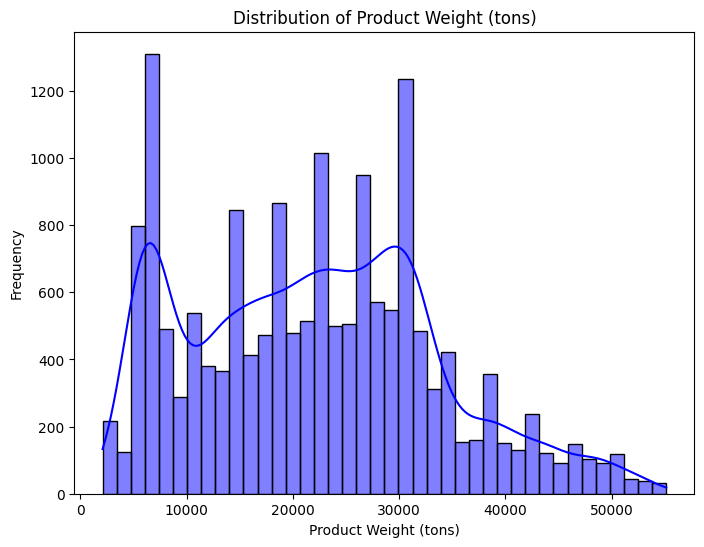

In [447]:
#Visualize the distribution of numerical column:
plt.figure(figsize=(8, 6))
sns.histplot(df['product_wg_ton'], kde=True, color='blue')
plt.title('Distribution of Product Weight (tons)')
plt.xlabel('Product Weight (tons)')
plt.ylabel('Frequency')
plt.show()


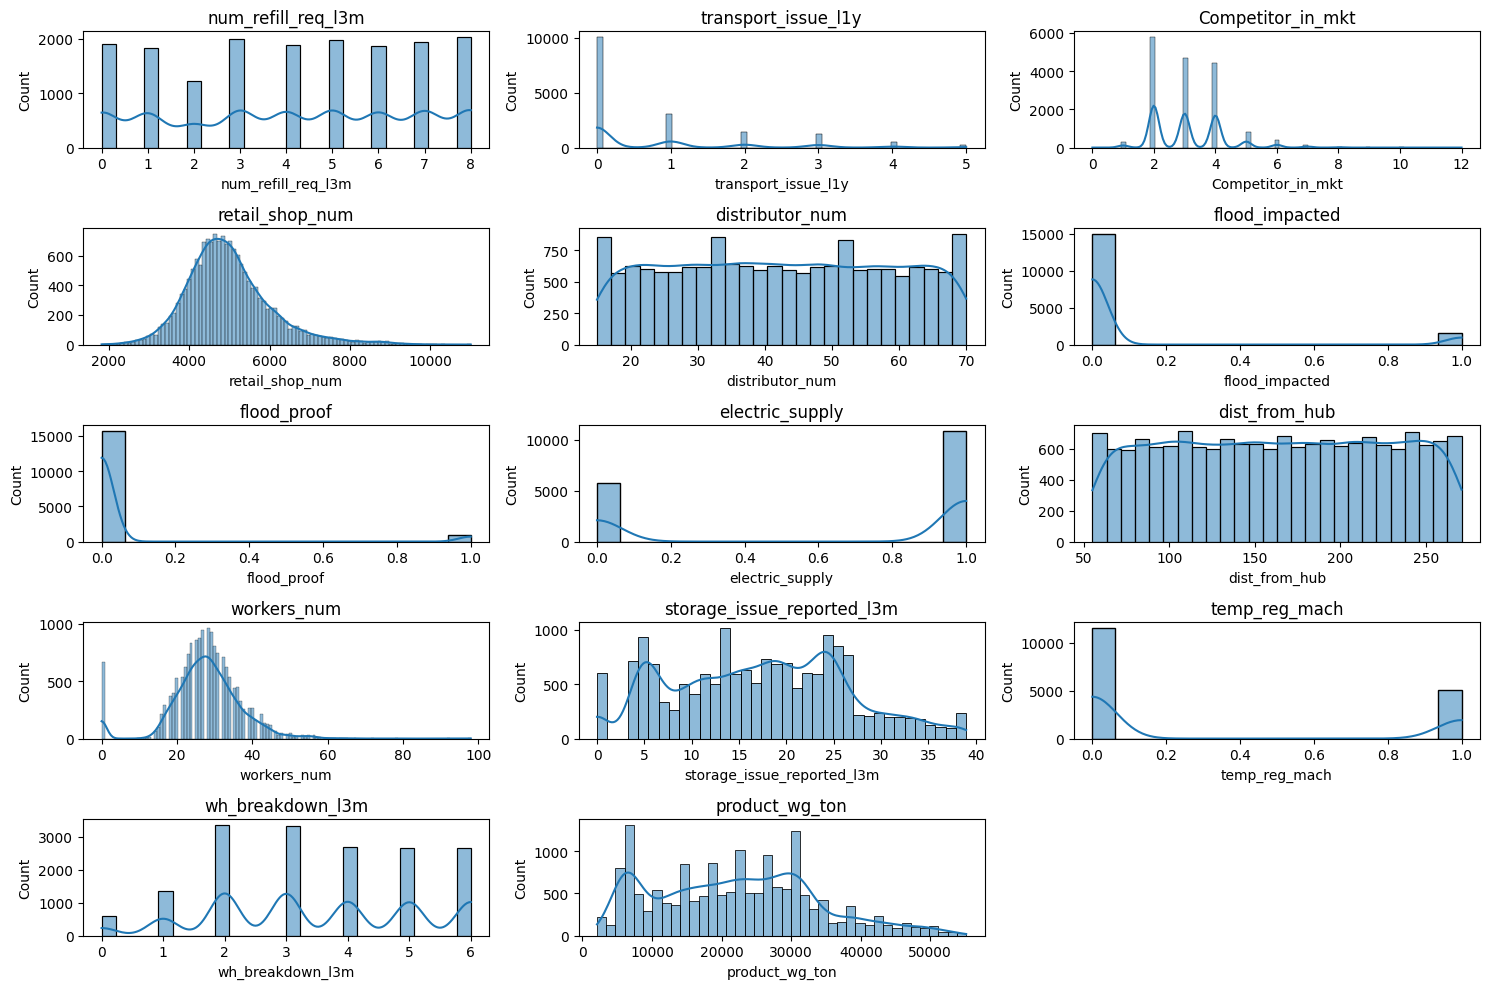

In [448]:
#Visualize the distribution of each numerical column:
plt.figure(figsize=(15, 10))
num_plots = len(numerical_columns)
num_rows = num_plots // 3 + (num_plots % 3 > 0)
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(num_rows, 3, i)
    sns.histplot(df[col], kde=True)
    plt.title(col)
plt.tight_layout()
plt.show()

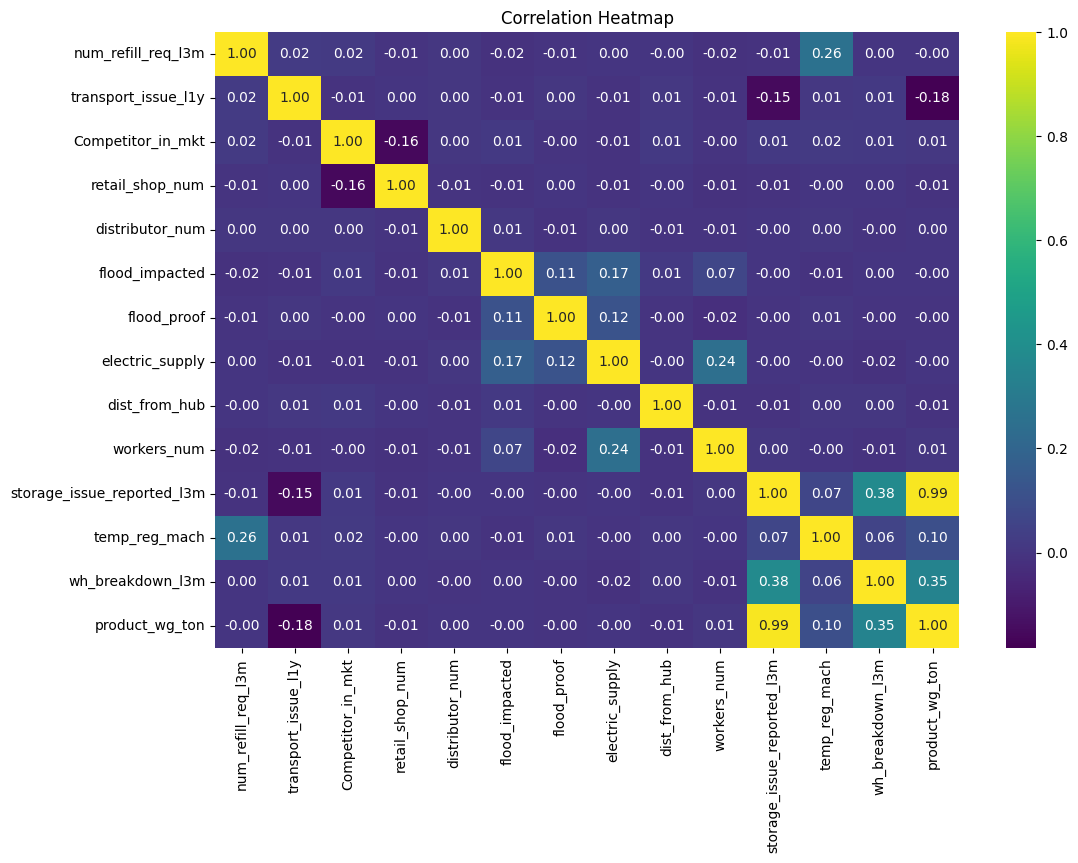

In [449]:
#Visualize the relationships between variables using a correlation heatmap:
# Visualize the correlation matrix as a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='viridis', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

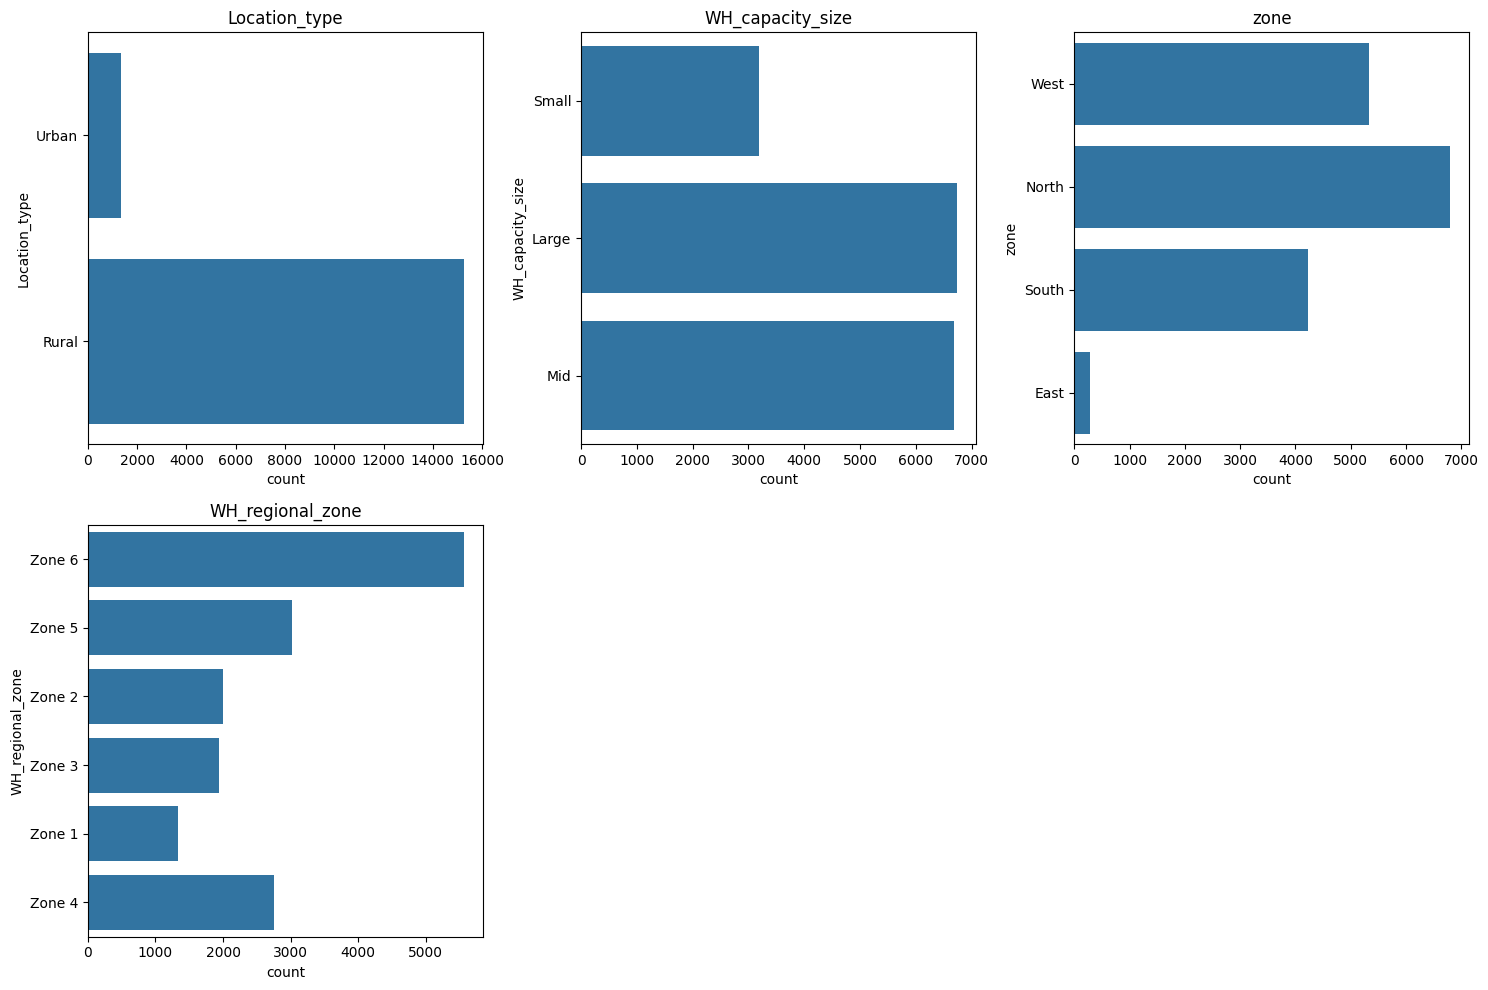

In [450]:
#Check the distribution of categorical variables:
plt.figure(figsize=(15, 10))
num_plots = len(categorical_columns)
num_rows = num_plots // 3 + (num_plots % 3 > 0)  # Calculate number of rows
for i, col in enumerate(categorical_columns, 1):
    plt.subplot(num_rows, 3, i)
    sns.countplot(df[col])
    plt.title(col)
plt.tight_layout()
plt.show()

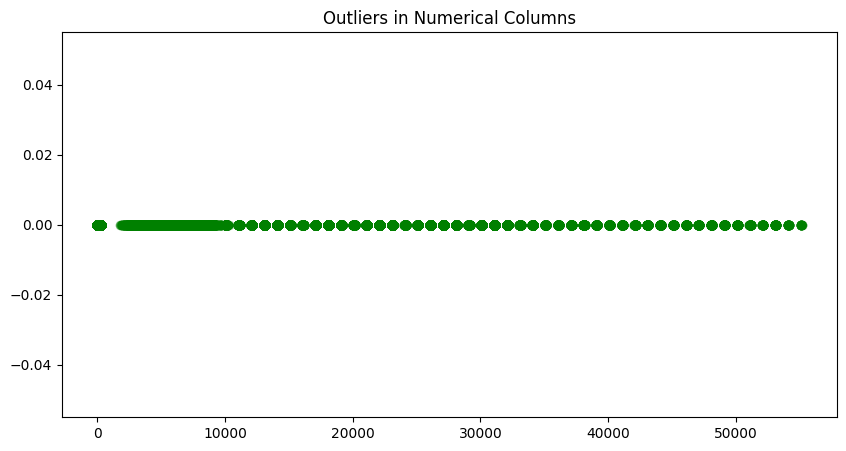

In [451]:
plt.figure(figsize=(10, 5))
for col in numerical_columns:
    plt.scatter(df[col], np.zeros_like(df[col]), alpha=0.5, color='green')
plt.title('Outliers in Numerical Columns')
plt.show()

In [452]:
#Preprocess the outliers:
#Remove outliers based on the interquartile range (IQR):
Q1 = df[numerical_columns].quantile(0.25)
Q3 = df[numerical_columns].quantile(0.75)
IQR = Q3 - Q1
df = df[~((df[numerical_columns] < (Q1 - 1.5 * IQR)) | (df[numerical_columns] > (Q3 + 1.5 * IQR))).any(axis=1)]

In [453]:
#Encode categorical variables
df = pd.get_dummies(df, columns=['Location_type', 'WH_capacity_size', 'zone', 'WH_regional_zone'], drop_first=True)

In [454]:
#split the data into feature and target variable:
X = df.drop(['product_wg_ton'], axis=1)
y = df['product_wg_ton']

In [455]:
#split the data into train and test set:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [456]:
#feature scaling:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [457]:
#Initialize models:
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'SVR': SVR(),
    'KNN': KNeighborsRegressor()
}

In [458]:
# The models dictionary and fits each model on the scaled training data, makes predictions on the scaled test data.
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
# Calculates the Root Mean Squared Error (RMSE) and R^2 score for each model using the mean_squared_error and r2_score functions from scikit-learn library.
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    print(f"{name}: RMSE = {rmse}, R^2 = {r2}")

Linear Regression: RMSE = 1863.3743987440537, R^2 = 0.9760388011978802
Decision Tree: RMSE = 2047.1403132769287, R^2 = 0.9710796519575559
Random Forest: RMSE = 1509.8560893339397, R^2 = 0.9842681642499729
SVR: RMSE = 11922.93140234125, R^2 = 0.018987854293024076
KNN: RMSE = 6335.967243747142, R^2 = 0.7229653189024778


In [459]:
#Save the trained models and scaler object using pickle
with open('supply_chain_models.pkl', 'wb') as file:
    pkl.dump({'models': models, 'scaler': scaler}, file)

In [460]:
#Load the validation dataset and preprocessing
validation_df = pd.read_csv("C:\\Users\\merli\\Downloads\\supply_test.csv")

In [461]:
#Droping irrelevant columns
cols_to_drop = ['wh_owner_type','Ware_house_ID','wh_est_year','Unnamed: 0','WH_Manager_ID','approved_wh_govt_certificate','govt_check_l3m']
validation_df.drop(cols_to_drop,axis=1, inplace=True)

In [462]:
#Check for missing values
validation_df.isna().sum()

Location_type                   0
WH_capacity_size                0
zone                            0
WH_regional_zone                0
num_refill_req_l3m              0
transport_issue_l1y             0
Competitor_in_mkt               0
retail_shop_num                 0
distributor_num                 0
flood_impacted                  0
flood_proof                     0
electric_supply                 0
dist_from_hub                   0
workers_num                   210
storage_issue_reported_l3m      0
temp_reg_mach                   0
wh_breakdown_l3m                0
product_wg_ton                  0
dtype: int64

In [463]:
#Handle missing values:
validation_df['workers_num'] = validation_df['workers_num'].fillna(0)

In [464]:
#Get the list of categorical and numerical columns in validation dataset:
categorical_col = validation_df.select_dtypes(include=['object']).columns
numerical_col = validation_df.select_dtypes(exclude=['object']).columns
print(categorical_col)
print(numerical_col)

Index(['Location_type', 'WH_capacity_size', 'zone', 'WH_regional_zone'], dtype='object')
Index(['num_refill_req_l3m', 'transport_issue_l1y', 'Competitor_in_mkt',
       'retail_shop_num', 'distributor_num', 'flood_impacted', 'flood_proof',
       'electric_supply', 'dist_from_hub', 'workers_num',
       'storage_issue_reported_l3m', 'temp_reg_mach', 'wh_breakdown_l3m',
       'product_wg_ton'],
      dtype='object')


In [465]:
# Remove outliers based on the interquartile range (IQR)
Q1 = df[numerical_columns].quantile(0.25)
Q3 = df[numerical_columns].quantile(0.75)
IQR = Q3 - Q1
validation_df = validation_df[~((validation_df[numerical_columns] < (Q1 - 1.5 * IQR)) | (validation_df[numerical_columns] > (Q3 + 1.5 * IQR))).any(axis=1)]

In [466]:
#Encode the categorical columns
validation_df = pd.get_dummies(validation_df, columns=['Location_type', 'WH_capacity_size', 'zone', 'WH_regional_zone'], drop_first=True)

In [467]:
#Load the trained models and scaler object using pickle
with open('supply_chain_models.pkl', 'rb') as file:
    models_dict = pkl.load(file)
    models = models_dict['models']
    scaler = models_dict['scaler']

In [468]:
#Preprocess the validation dataset using the same scaler object as the training dataset
val_scaled = scaler.transform(validation_df.drop(['product_wg_ton'], axis=1))

In [469]:
#Make predictions on the validation dataset using each model
val_preds = {}
for name, model in models.items():
    val_preds[name] = model.predict(val_scaled)

In [470]:
#Calculate evaluation metrics for each model
val_rmse = {}
val_r2 = {}
for name, pred in val_preds.items():
    rmse = np.sqrt(mean_squared_error(validation_df['product_wg_ton'], pred))
    r2 = r2_score(validation_df['product_wg_ton'], pred)
    val_rmse[name] = rmse
    val_r2[name] = r2

In [471]:
#Print evaluation metrics for each model
print("Validation metrics for each model:")
for name, rmse in val_rmse.items():
    r2 = val_r2[name]
    print(f"{name}: RMSE = {rmse:.2f}, R^2 = {r2:.2f}")

Validation metrics for each model:
Linear Regression: RMSE = 1804.09, R^2 = 0.98
Decision Tree: RMSE = 1981.40, R^2 = 0.97
Random Forest: RMSE = 1450.30, R^2 = 0.98
SVR: RMSE = 11715.71, R^2 = 0.02
KNN: RMSE = 6294.86, R^2 = 0.72


([0, 1, 2, 3, 4],
 [Text(0, 0, 'Linear Regression'),
  Text(1, 0, 'Decision Tree'),
  Text(2, 0, 'Random Forest'),
  Text(3, 0, 'SVR'),
  Text(4, 0, 'KNN')])

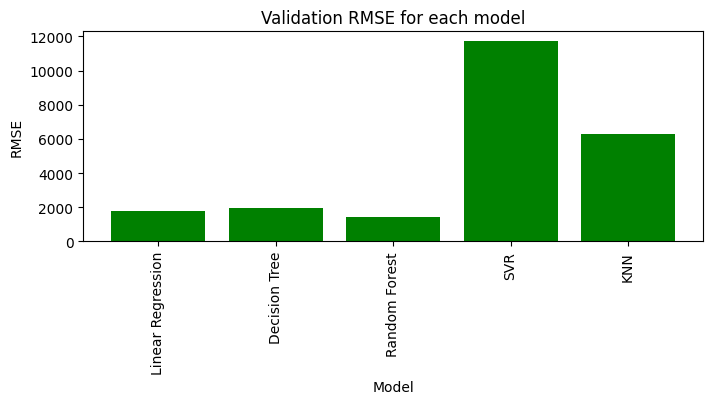

In [472]:
# Validation metrics for each model
#Bar plot for RMSE:
models = ['Linear Regression', 'Decision Tree', 'Random Forest', 'SVR', 'KNN']
rmse_values = [1804.09,1962.47,1454.51,11715.71,6294.86]
r2_values = [0.98, 0.97, 0.98, 0.02, 0.72]
plt.figure(figsize=(8, 6))
plt.subplot(2, 1, 1)
plt.bar(models, rmse_values, color='green')
plt.title('Validation RMSE for each model')
plt.xlabel('Model')
plt.ylabel('RMSE')
plt.xticks(rotation=90)

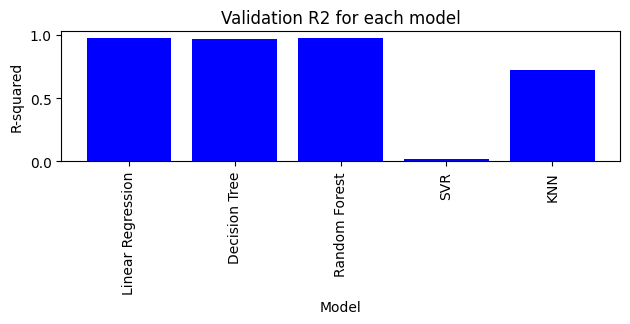

In [473]:
#Bar plot for R-squared:
plt.subplot(2, 1, 2)
plt.bar(models, r2_values, color='blue')
plt.title('Validation R2 for each model')
plt.xlabel('Model')
plt.ylabel('R-squared')
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()
